# 1. Input the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

print('Tensorflow version:',tf.__version__)

Tensorflow version: 2.9.1


# 2. Load the dataset after loading the dataset, you have to normalize every image.

In [3]:
# Load the dataset
data = np.load('ORL_faces.npz')

In [4]:
# Load the train dataset
xtrain = data['trainX']

# Normalize the images
xtrain = np.array(xtrain,dtype='float32') / 255

In [5]:
#Load the test dataset
xtest = data['testX']

# Normalize the images
xtest = np.array(xtest,dtype='float32') / 255

In [6]:
# Load the labels of dataset
ytrain = data['trainY']
ytest = data['testY']

In [7]:
print('xtrain :',xtrain)
print('\n ytrain :',ytrain)

xtrain : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]

 ytrain : [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 

In [8]:
print('Shape of xtrain :',xtrain.shape)
print('Shape of xtest :',xtest.shape)
print('Shape of ytrain :',ytrain.shape)
print('Shape of ytest :',ytest.shape)

Shape of xtrain : (240, 10304)
Shape of xtest : (160, 10304)
Shape of ytrain : (240,)
Shape of ytest : (160,)


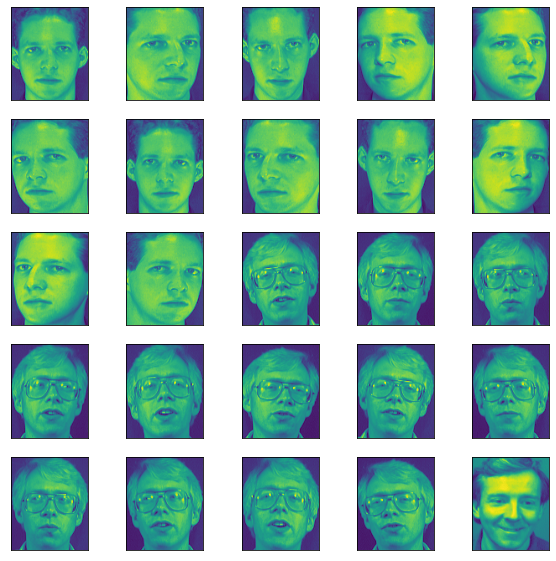

In [9]:
# Visualize the train image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(xtrain[i].reshape(112,92))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

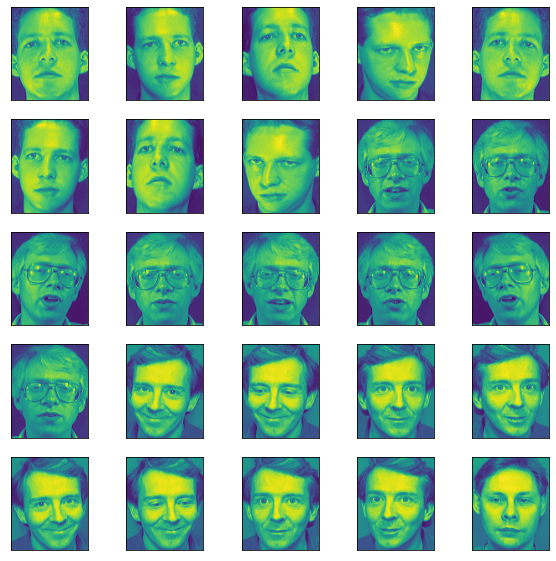

In [10]:
# Visualize the test image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(xtest[i].reshape(112,92))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

# 3. Split the dataset

In [11]:
xtrain,xvalid,ytrain,yvalid = train_test_split(xtrain,ytrain,test_size=0.05,random_state=41)

In [12]:
print('Shape of xtrain :',xtrain.shape)
print('Shape of xtest :',xvalid.shape)
print('Shape of ytrain :',ytrain.shape)
print('Shape of ytest :',yvalid.shape)

Shape of xtrain : (228, 10304)
Shape of xtest : (12, 10304)
Shape of ytrain : (228,)
Shape of ytest : (12,)


# 4. Transform the images to equal sizes to feed in CNN

In [13]:
# Shape of image definition
rows = 112
columns = 92
image_shape = (rows,columns,1)

In [14]:
xtrain = xtrain.reshape(xtrain.shape[0], *image_shape)
xtest = xtest.reshape(xtest.shape[0], *image_shape)
xvalid = xvalid.reshape(xvalid.shape[0], *image_shape)

In [15]:
print('Shape of xtrain :',xtrain.shape)
print('Shape of xtest :',xtest.shape)
print('Shape of xvalid :',xvalid.shape)

Shape of xtrain : (228, 112, 92, 1)
Shape of xtest : (160, 112, 92, 1)
Shape of xvalid : (12, 112, 92, 1)


# 5. Build a CNN model that has 3 main layers:

i. Convolutional Layer

ii. Pooling Layer

iii. Fully Connected Layer

In [16]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=7,activation='relu',input_shape=image_shape))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=5,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(2024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20,activation='softmax'))

In [17]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=Adam(learning_rate=0.001),
             metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 32)       1600      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 29184)             0         
                                                                 
 dense (Dense)               (None, 2024)              5

# 6. Train the model

In [19]:
history = model.fit(np.array(xtrain),np.array(ytrain),
                    batch_size=512,
                    epochs=100,
                    verbose=1,
                    validation_data=(np.array(xvalid),np.array(yvalid)))

Epoch 1/100
1/1 [==============================] - 250s 250s/step - loss: 3.0142 - accuracy: 0.0439 - val_loss: 3.2184 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 47s 47s/step - loss: 3.4576 - accuracy: 0.0263 - val_loss: 3.0100 - val_accuracy: 0.1667
Epoch 3/100
1/1 [==============================] - 67s 67s/step - loss: 3.0677 - accuracy: 0.0307 - val_loss: 3.0096 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 21s 21s/step - loss: 2.9916 - accuracy: 0.0658 - val_loss: 2.9966 - val_accuracy: 0.0833
Epoch 5/100
1/1 [==============================] - 14s 14s/step - loss: 2.9897 - accuracy: 0.0439 - val_loss: 2.9936 - val_accuracy: 0.0833
Epoch 6/100
1/1 [==============================] - 22s 22s/step - loss: 2.9834 - accuracy: 0.0746 - val_loss: 2.9991 - val_accuracy: 0.0833
Epoch 7/100
1/1 [==============================] - 16s 16s/step - loss: 2.9696 - accuracy: 0.1053 - val_loss: 3.0050 - val_accuracy: 0.0000e+00
Epoch 

In [20]:
score = model.evaluate(np.array(xtest),np.array(ytest),verbose=1)

print('Test Loss {:.4f}'.format(score[0]))
print('Test Accuracy {:.4f}'.format(score[1]))

5/5 [==============================] - 7s 631ms/step - loss: 0.5774 - accuracy: 0.9250
Test Loss 0.5774
Test Accuracy 0.9250


# 7. Plot the result

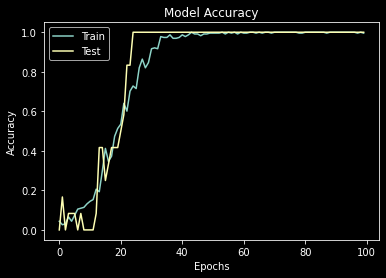

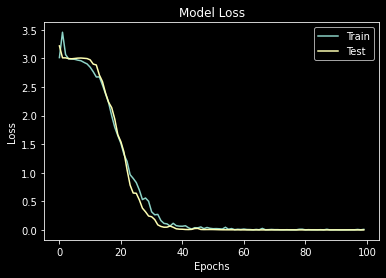

In [21]:
with plt.style.context('dark_background'):
    # Summarize history for Accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Test'],loc='best')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train','Test'],loc='best')
    plt.show()

# 8. Iterate the model until the accuracy is above 90%

In [22]:
y_pred = model.predict(xtest)
y_pred = np.argmax(y_pred,axis=1)

5/5 [==============================] - 12s 542ms/step


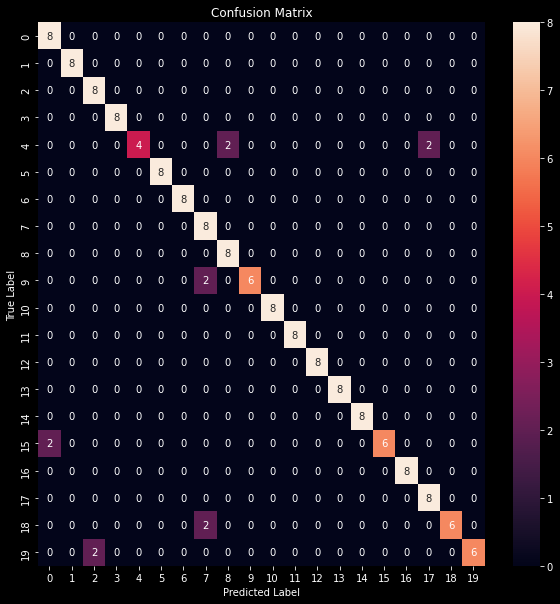

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      1.00      1.00         8
           2       0.80      1.00      0.89         8
           3       1.00      1.00      1.00         8
           4       1.00      0.50      0.67         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.67      1.00      0.80         8
           8       0.80      1.00      0.89         8
           9       1.00      0.75      0.86         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      0.75      0.86         8
          16       1.00      1.00      1.00         8
          17       0.80    

In [23]:
with plt.style.context('dark_background'):
    cm = confusion_matrix(ytest,y_pred)
    plt.figure(figsize=(10,10))
    f = sns.heatmap(cm,annot=True,fmt='d')
    f.set_title('Confusion Matrix',color='white')
    plt.xlabel('Predicted Label',color='white')
    plt.ylabel('True Label',color='white')
    plt.show()
print(classification_report(ytest,y_pred))